![image](./images/movie-business-consumer-demand.jpg)

# **Movie Industry Analysis**
### Client  :  Microsoft
> *Authored by: Patrick Anastasio*

## Introduction

In preparation of entering the movie production business, Microsoft has asked me to prepare an analysis of current movie trends and to generate suggestions as to where to invest capital and how they can be sussesful in producing profitable movies. I will be analysing several datasets and making inferences off of financial information, ratings and popularity scores, as well as looking at established industry professionals to make suggestions on what genres and types of films to invest in and who to attach to projects to create buzz and generate an audience.

![image](./images/risky2.jpg)

## Business Problem

Movies are a 'risky business.' As a fledgling production house, Microsoft is unsure as to what kinds of movies to make, and where to invest capital. They lack the experience and industry knowledge that many of the top studios possess. Several factors go into producing a succesful movie. There are a few over-arching features that we will focus on: (1) gross revenue of the top rated and top grossing movies of the modern film era, (2) popular and highly rated genres, and (3) industry professionals who were instrumental in creating these movies.

## The Data

I have pulled in multiple datasets from three industry standard data aggregation sites.
- [Internet Movie Database (IMDB)](https://www.imdb.com/)
- [The Movie Database (TMDB)](https://www.themoviedb.org/?language=en-US)
- [The Numbers](https://www.the-numbers.com/)

My subsequent filtering and analysis of these datasets focused on the following metrics:
> - Financials: 
>    - Budget and Domestic Gross Revenue
> - Ratings and Popularity Scores
> - Movie Genres
> - Names of directors

## The Method

After merging the datasets of interest I narrowed the scope of my analysis by initially filtering the data to only include movies made from 2010 forward. This constitutes the modern era of movie-making, and is characterized by new technologies, an explosion of investment and bigger budgets.

I then converted data types as needed to allow me to operate on them. Specifically, converting objects to numbers to allow me to work with them mathematically.

From these merged and cleaned datasets I pulled dataframes based on:
>1. ratings and popularity scores across all movies and averaged these into specific genres  
>2. domestic gross revenue across all movies, and then honing in on the top thirty (30) grossing movies and their budgets  
>3. directors of the top thirty (30) grossing movies, as well as writers and actors.

In [1]:
# import the packages that will be used in this project

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

## Import the data
#### Read in the raw data files, and create the dataframes I will work with

In [2]:
names_by_id = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz')

names_by_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [3]:
title_ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')

title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [4]:
title_and_genre = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')

title_and_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [5]:
directors_and_writers = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz')

directors_and_writers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [6]:
talent_list = pd.read_csv('data/zippedData/imdb.title.principals.csv.gz')

talent_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [7]:
popularity_and_votes = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')

popularity_and_votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [8]:
budget_and_gross = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')

budget_and_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## Clean & Analyze the data
#### I am looking to draw inferences from
* hype measured by ratings and popularity
* budget and gross (for simplicity's sake I will only focus on domestic gross)
* talent attached to popular and profitable movies

### Genre by average rating
>I pull out a dataframe that contains information on a movie's genre and its rating

In [9]:
# Merge the datafiles based on common key 'tconst'

genre_by_rating = title_and_genre.merge(title_ratings, on='tconst')

genre_by_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


#### As stated above, the focus is on movies produced in the modern era  
>I need to filter out titles that were made before the year 2010

In [10]:
# notice from the info that 'start_year' is of dtype: float, which will make filtering easier that converting a dtype: object to datetime

# filter on movies produced from 2010 forward

genre_by_rating = genre_by_rating[genre_by_rating['start_year'] >= 2010.00]

genre_by_rating['start_year'].min()

2010

In [11]:
# take the slice we want

genre_by_rating = genre_by_rating.loc[:, ('original_title', 'genres', 'averagerating', 'numvotes')]

genre_by_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  73856 non-null  object 
 1   genres          73052 non-null  object 
 2   averagerating   73856 non-null  float64
 3   numvotes        73856 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 2.8+ MB


In [12]:
# drop the null values in 'genres'

genre_by_rating.dropna(subset=['genres'], axis=0, inplace=True)

genre_by_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 73855
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  73052 non-null  object 
 1   genres          73052 non-null  object 
 2   averagerating   73052 non-null  float64
 3   numvotes        73052 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 2.8+ MB


In [13]:
# drop duplicate titles

genre_by_rating.drop_duplicates(subset='original_title', inplace=True)

genre_by_rating.head()

,original_title,genres,averagerating,numvotes
0,Sunghursh,"Action,Crime,Drama",7.0,77
1,Ashad Ka Ek Din,"Biography,Drama",7.2,43
2,The Other Side of the Wind,Drama,6.9,4517
3,Sabse Bada Sukh,"Comedy,Drama",6.1,13
4,La Telenovela Errante,"Comedy,Drama,Fantasy",6.5,119


In [14]:
# filter out movies that do not have many votes, we will set the threshold to at least 300 votes

low_votes = genre_by_rating[genre_by_rating['numvotes'] < 300.0].index
genre_by_rating.drop(low_votes, inplace=True)

genre_by_rating['numvotes'].min()

300

In [15]:
# filter out low ratings to focus on high rated movies, we will set the threshold at a rating score of 8.5

# filter out the low ratings

low_ratings = genre_by_rating[genre_by_rating['averagerating'] < 8.5].index
genre_by_rating.drop(low_ratings, inplace=True)

genre_by_rating['averagerating'].min()

8.5

In [16]:
genre_by_rating.head()

,original_title,genres,averagerating,numvotes
216,Samsara,"Documentary,Music",8.5,29725
280,Interstellar,"Adventure,Drama,Sci-Fi",8.6,1299334
616,Chandigarh amritsar chandigarh,"Comedy,Drama,Romance",9.4,952
840,Tylko nie mów nikomu,Documentary,8.9,2111
879,Adutha Chodyam,Drama,9.3,587


In [17]:
# notice that there are 'genres' values that have multiple genres listed separated by commas
# I will focus on movies with only one genre

# drop values with multiple genres

genre_by_rating_multigenre = genre_by_rating[genre_by_rating['genres'].str.contains(',')].index
genre_by_rating.drop(genre_by_rating_multigenre, inplace=True)

genre_by_rating['genres'].unique()

array(['Documentary', 'Drama', 'Animation', 'Musical', 'Biography',
       'Thriller', 'Family', 'Comedy', 'Action', 'History', 'Adventure'],
      dtype=object)

In [18]:
# then we group our dataframe by 'genres' and show the mean of average ratings for each genre

genre_by_rating_means = genre_by_rating.groupby('genres').mean().sort_values(by='averagerating', ascending=False)

genre_by_rating_means

,averagerating,numvotes
genres,,
Action,9.200000,560.500000
Thriller,9.033333,645.000000
Documentary,8.982143,924.607143
Drama,8.943243,2429.162162
Comedy,8.940000,634.000000
Animation,8.900000,580.500000
Family,8.733333,390.333333
Adventure,8.700000,382.000000
Musical,8.625000,1417.000000


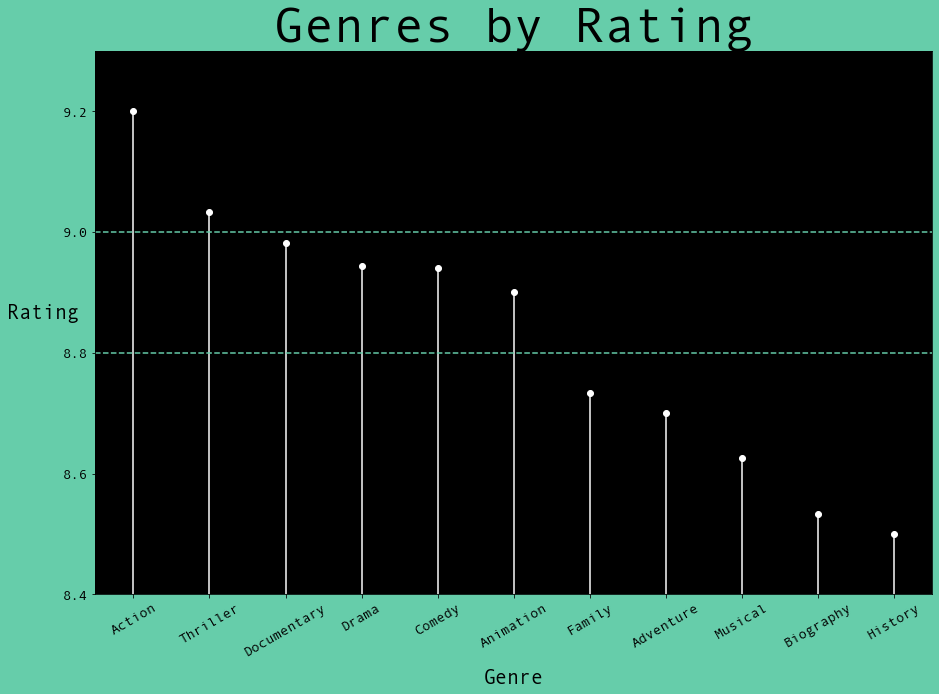

In [23]:
# create the plot

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
fig.set_facecolor('mediumaquamarine')
ax.set_facecolor('black')
ax.stem(genre_by_rating_means.index, genre_by_rating_means['averagerating'], linefmt='w-', markerfmt='wo', basefmt='w')
ax.set(ylim=(8.4, 9.3),)
ax.set_xlabel('Genre', font='Andale Mono', fontsize=20, labelpad=10)
ax.set_ylabel('Rating', rotation=0, font='Andale Mono', fontsize=20, labelpad=20)
ax.set_title('Genres by Rating', font='Andale Mono', fontsize=50, loc="center", pad=10)
plt.xticks(font='Andale Mono', fontsize=14)
plt.yticks(font='Andale Mono', fontsize=14)
plt.axhline(y=9.0, ls='--', c='mediumaquamarine')
plt.axhline(y=8.8, ls='--', c='mediumaquamarine')
ax.tick_params(axis='x', labelrotation = 30)
# plt.savefig('./images/genres_by_rating.png')

### Gross Profit
>I pull out a dataframe that contains information on a movie's popularity and financials

In [20]:
# I will have to merge The Numbers dataset but there is no common key
# notice the 'movie' key is the same as the 'original_title' key

# rename the 'movie' key to 'original_title' to merge it

budget_and_gross.rename({'movie':'original_title'}, axis=1, inplace=True)

budget_and_gross.head(1)

,id,release_date,original_title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"


In [21]:
# merge the required datasets

popularity_financials = title_and_genre.merge(
    popularity_and_votes, on='original_title', how='right').merge(
    budget_and_gross, on='original_title', how='right')

popularity_financials.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7903 entries, 0 to 7902
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             3922 non-null   object 
 1   primary_title      3922 non-null   object 
 2   original_title     7903 non-null   object 
 3   start_year         3922 non-null   float64
 4   runtime_minutes    3521 non-null   float64
 5   genres             3863 non-null   object 
 6   Unnamed: 0         4080 non-null   float64
 7   genre_ids          4080 non-null   object 
 8   id_x               4080 non-null   float64
 9   original_language  4080 non-null   object 
 10  popularity         4080 non-null   float64
 11  release_date_x     4080 non-null   object 
 12  title              4080 non-null   object 
 13  vote_average       4080 non-null   float64
 14  vote_count         4080 non-null   float64
 15  id_y               7903 non-null   int64  
 16  release_date_y     7903 

In [22]:
# filter on movies produced from 2010 forward

popularity_financials = popularity_financials[popularity_financials['start_year'] >= 2010.00]

popularity_financials['start_year'].min()

2010.0

In [24]:
# take the slice we want

popularity_financials = popularity_financials.loc[:, ('original_title', 'popularity', 'production_budget', 'domestic_gross')]

popularity_financials.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3922 entries, 1 to 7893
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_title     3922 non-null   object 
 1   popularity         3922 non-null   float64
 2   production_budget  3922 non-null   object 
 3   domestic_gross     3922 non-null   object 
dtypes: float64(1), object(3)
memory usage: 153.2+ KB


In [25]:
# drop duplicate titles

popularity_financials.drop_duplicates(subset='original_title', inplace=True)

popularity_financials.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1760 entries, 1 to 7893
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_title     1760 non-null   object 
 1   popularity         1760 non-null   float64
 2   production_budget  1760 non-null   object 
 3   domestic_gross     1760 non-null   object 
dtypes: float64(1), object(3)
memory usage: 68.8+ KB


#### Unfortunately, the values in the financial columns are of dtype: object
>I need to convert these values to a number dtype to work with them mathematically

In [26]:
# create a function that will take an object and transform it into a number

def drop_dollar_sign_and_commas(value):
    """
    this will split the object into a list of characters using the list() function
    then iterate over the list and drop the $ sign, and remove commas from the list
    use the .remove() method to drop the $
    use a for loop to remove the commas, as .remove() will only remove the first instance, and some values contain more than one comma
    then use the .join() method to reconneect the list into a single string
    finally turn that string into a float, and return it
    """
    
    value_list = list(value)
    value_list.remove('$')
    for char in value_list:
        if ',' == char:
            value_list.remove(char)
    value_float = float(''.join(value_list))
    return value_float

In [27]:
# create new columns for the float values using .map() and our function above

popularity_financials['Budget'] = popularity_financials['production_budget'].map(drop_dollar_sign_and_commas)
popularity_financials['Domestic Gross'] = popularity_financials['domestic_gross'].map(drop_dollar_sign_and_commas)

popularity_financials.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1760 entries, 1 to 7893
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_title     1760 non-null   object 
 1   popularity         1760 non-null   float64
 2   production_budget  1760 non-null   object 
 3   domestic_gross     1760 non-null   object 
 4   Budget             1760 non-null   float64
 5   Domestic Gross     1760 non-null   float64
dtypes: float64(3), object(3)
memory usage: 96.2+ KB


In [28]:
# slice for just the floats

popularity_financials = popularity_financials.loc[:, ('original_title', 'popularity', 'Budget', 'Domestic Gross')]

popularity_financials.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1760 entries, 1 to 7893
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  1760 non-null   object 
 1   popularity      1760 non-null   float64
 2   Budget          1760 non-null   float64
 3   Domestic Gross  1760 non-null   float64
dtypes: float64(3), object(1)
memory usage: 68.8+ KB


#### I need to find the gross profit of these movies
>The gross profit will be the domestic gross minus the budget

In [29]:
# create a column for gross profit

popularity_financials['Profit'] = popularity_financials['Domestic Gross'] - popularity_financials['Budget']

popularity_financials.head()

,original_title,popularity,Budget,Domestic Gross,Profit
1,Pirates of the Caribbean: On Stranger Tides,30.579,410600000.0,241063875.0,-169536125.0
3,Avengers: Age of Ultron,44.383,330600000.0,459005868.0,128405868.0
6,Avengers: Infinity War,80.773,300000000.0,678815482.0,378815482.0
8,Justice League,34.953,300000000.0,229024295.0,-70975705.0
10,Spectre,30.318,300000000.0,200074175.0,-99925825.0


In [30]:
# pull the 30 most profitable movies

most_profitable = popularity_financials.sort_values(by='Profit', ascending=False).head(30)

most_profitable.head()

,original_title,popularity,Budget,Domestic Gross,Profit
65,Black Panther,2.058,200000000.0,700059566.0,500059566.0
36,Jurassic World,20.709,215000000.0,652270625.0,437270625.0
68,Incredibles 2,36.286,200000000.0,608581744.0,408581744.0
28,The Avengers,50.289,225000000.0,623279547.0,398279547.0
6,Avengers: Infinity War,80.773,300000000.0,678815482.0,378815482.0


>Currency function below borrowed from [datavizpyr](https://datavizpyr.com/add-dollar-sign-on-axis-ticks-in-matplotlib/)

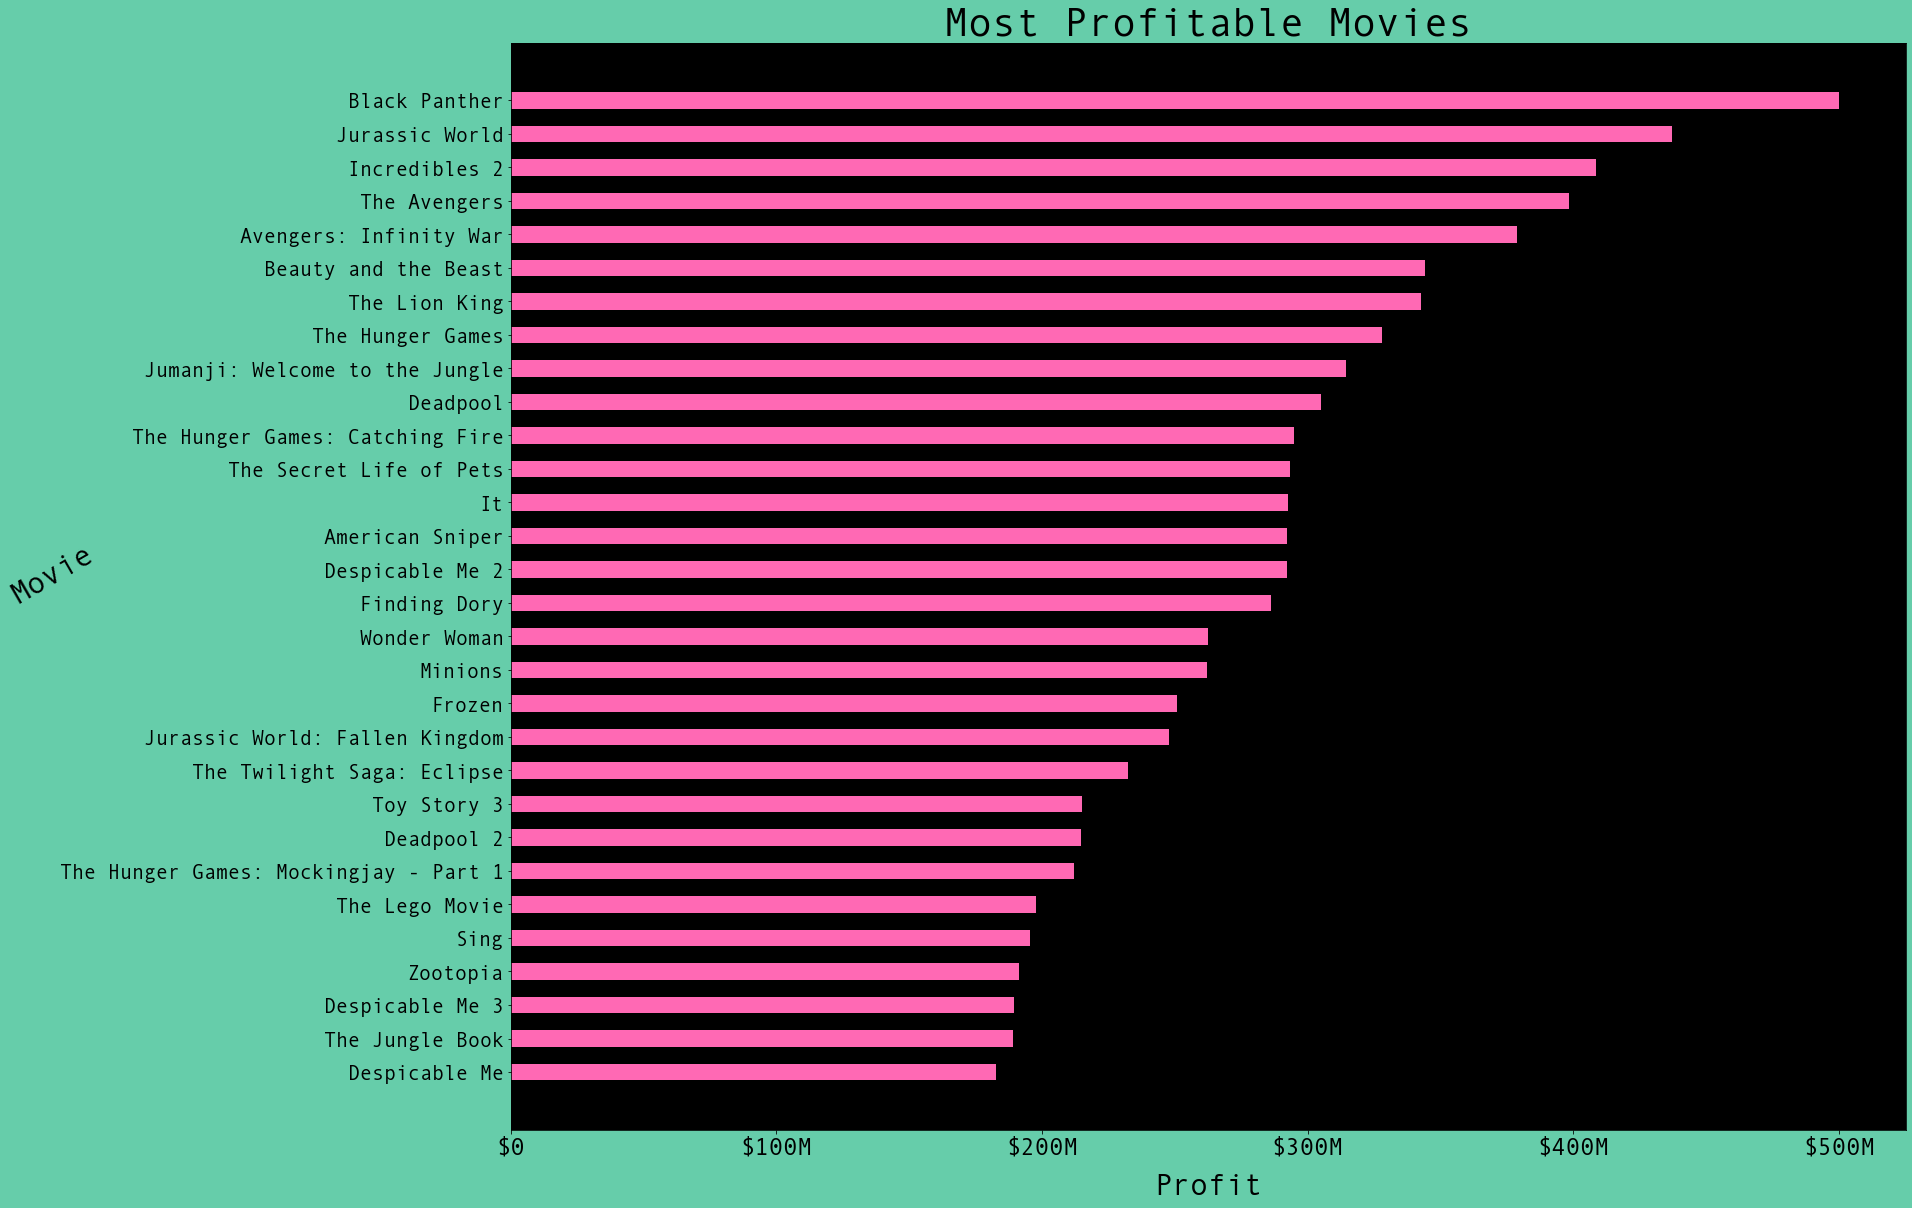

In [31]:
# plot the 30 most profitable movies

# we want to avoid scientific notation and put the tick numbers into short-form USD

# use [currency] function cited above

def currency(x, pos):
    """
    This function will format a tick of float type to currency
    The two args are the value and tick position
    """
    if x >= 1e6:
        s = '${:1.0f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}'.format(x*1e-3)
    return s


# create the plot

fig, ax = plt.subplots()
fig.set_size_inches(25, 20)
fig.set_facecolor('mediumaquamarine')
ax.set_facecolor('black')
ax.barh(most_profitable['original_title'], width=most_profitable['Profit'], height=0.5, color='hotpink')
ax.set_xlabel('Profit', font='Andale Mono', fontsize=30, labelpad=15)
ax.set_ylabel('Movie', rotation=30, font='Andale Mono', fontsize=30, labelpad=0)
ax.set_title('Most Profitable Movies', font='Andale Mono', fontsize=40, weight='bold', loc="center", pad=0)
plt.xticks(font='Andale Mono', fontsize=24, weight='bold')
plt.yticks(font='Andale Mono', fontsize=20, weight='bold')
ax.invert_yaxis()
plt.ticklabel_format(axis='x', style='plain')
ax.xaxis.set_major_formatter(currency)
# plt.savefig('./images/profit.png', dpi=200, bbox_inches='tight')

### Most Popular
>I pull out a dataframe that contains information on a movie's popularity

In [32]:
# pull the 30 most popular movies

most_popular = popularity_financials.sort_values(by='popularity', ascending=False).head(30)

most_popular.head()

,original_title,popularity,Budget,Domestic Gross,Profit
6,Avengers: Infinity War,80.773,300000000.0,678815482.0,378815482.0
2798,John Wick,78.123,30000000.0,43037835.0,13037835.0
23,The Hobbit: The Battle of the Five Armies,53.783,250000000.0,255119788.0,5119788.0
28,The Avengers,50.289,225000000.0,623279547.0,398279547.0
180,Guardians of the Galaxy,49.606,170000000.0,333172112.0,163172112.0


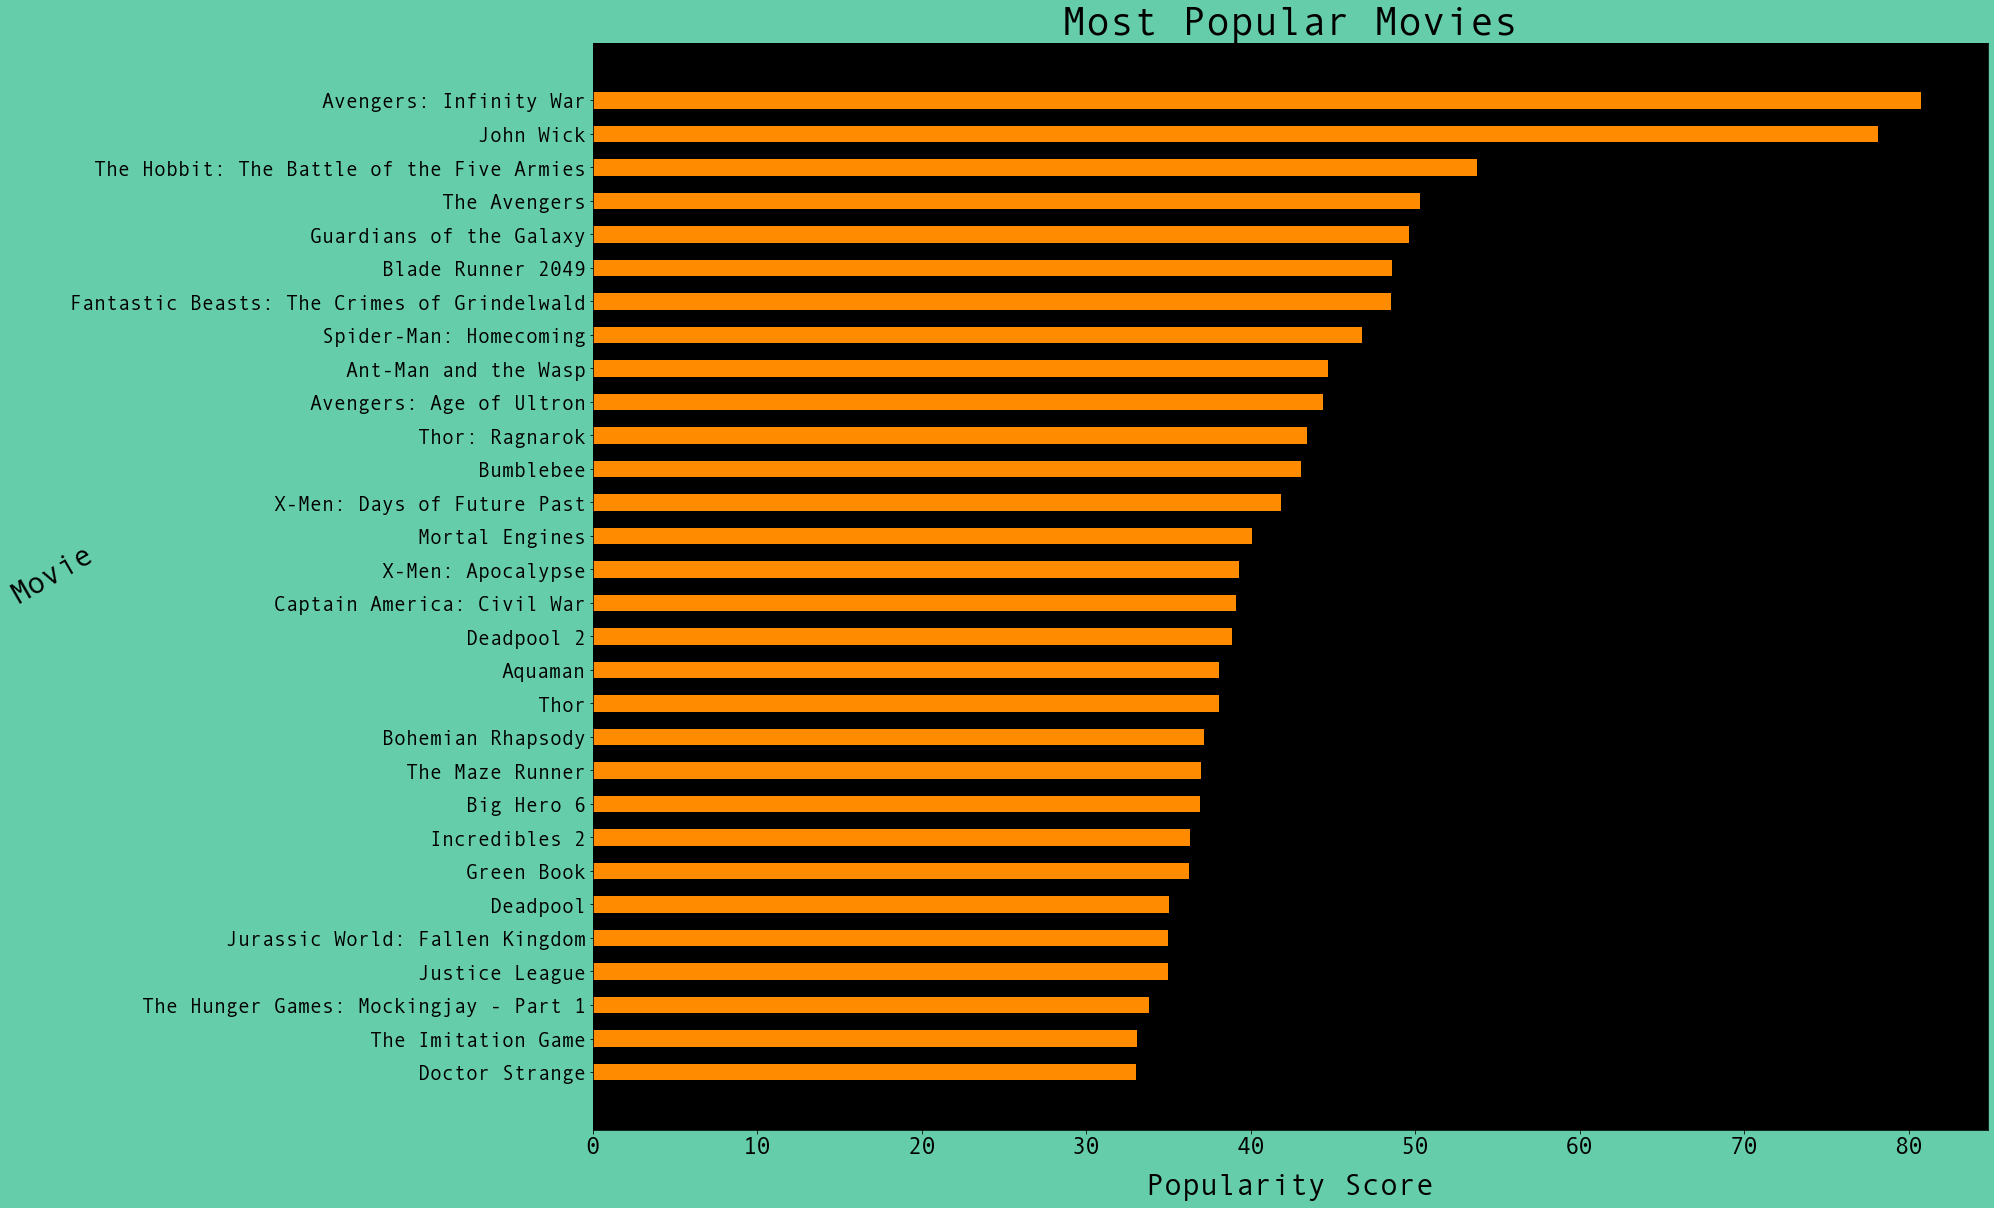

In [33]:
# create the plot

fig, ax = plt.subplots()
fig.set_size_inches(25, 20)
fig.set_facecolor('mediumaquamarine')
ax.set_facecolor('black')
ax.barh(most_popular['original_title'], width=most_popular['popularity'], height=0.5, color='darkorange')
ax.set_xlabel('Popularity Score', font='Andale Mono', fontsize=30, labelpad=15)
ax.set_ylabel('Movie', rotation=30, font='Andale Mono', fontsize=30, labelpad=10)
ax.set_title('Most Popular Movies', font='Andale Mono', fontsize=40, weight='bold', loc="center", pad=0)
plt.xticks(font='Andale Mono', fontsize=24, weight='bold')
plt.yticks(font='Andale Mono', fontsize=20, weight='bold')
ax.invert_yaxis()
# plt.savefig('./images/popularity_score.png', dpi=200, bbox_inches='tight')

### Popularity vs. Budget
>I want to see if there is a correlation between popularity and budget

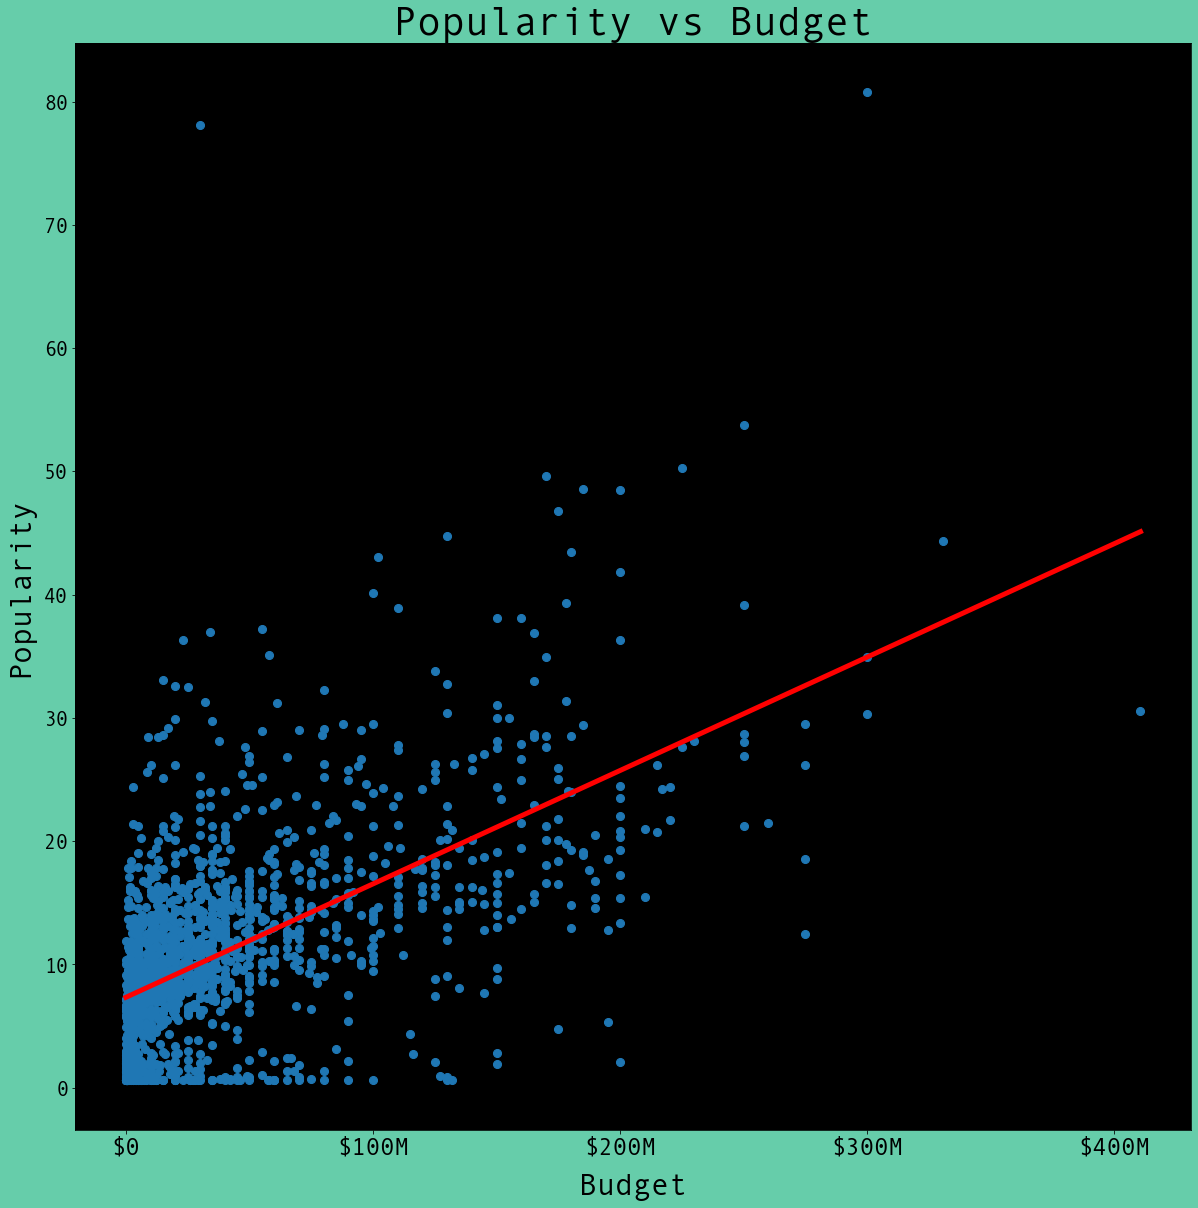

In [34]:
# create a scatter plot with a regression line for popularity vs. budget

# create the the plot

fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
fig.set_facecolor('mediumaquamarine')
ax.set_facecolor('black')
ax.scatter(popularity_financials['Budget'], popularity_financials['popularity'], s=65)
ax.set_xlabel('Budget', font='Andale Mono', fontsize=30, labelpad=15)
ax.set_ylabel('Popularity', rotation=90, font='Andale Mono', fontsize=30, labelpad=10)
ax.set_title('Popularity vs Budget', font='Andale Mono', fontsize=40, weight='bold', loc="center", pad=0)
plt.xticks(font='Andale Mono', fontsize=24, weight='bold')
plt.yticks(font='Andale Mono', fontsize=20, weight='bold')
ax.xaxis.set_major_formatter(currency)


#add the regression line to scatterplot

m, b = np.polyfit(popularity_financials['Budget'], popularity_financials['popularity'], 1)
plt.plot(popularity_financials['Budget'], m*popularity_financials['Budget']+b, color='red', linewidth=5)

# plt.savefig('./images/popularity_vs_budget.png')

### Most Profitable Directors
>I want to see who directed the most profitable movies

In [35]:
# merge the 'directors_and_writers' dataset with the 'title_and _genre'

directors_merged = title_and_genre.merge(directors_and_writers, on='tconst')

directors_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
 6   directors        140417 non-null  object 
 7   writers          110261 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 10.0+ MB


In [36]:
# we want to merge this with the 'names_by_id', but there is no common key

# change the name of the 'directors' column to a common key

directors_merged.rename({'directors':'nconst'}, axis=1, inplace=True)

directors_merged.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,nconst,writers
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",nm0002411,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,nm0000080,"nm0000080,nm0462648"
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",nm0611531,nm0347899
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy","nm0765384,nm0749914","nm1360635,nm0749914"


In [37]:
# merge on the common key

director_names_merged = directors_merged.merge(names_by_id, on='nconst')

director_names_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124689 entries, 0 to 124688
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tconst              124689 non-null  object 
 1   primary_title       124689 non-null  object 
 2   original_title      124688 non-null  object 
 3   start_year          124689 non-null  int64  
 4   runtime_minutes     98967 non-null   float64
 5   genres              121802 non-null  object 
 6   nconst              124689 non-null  object 
 7   writers             97304 non-null   object 
 8   primary_name        124689 non-null  object 
 9   birth_year          28223 non-null   float64
 10  death_year          777 non-null     float64
 11  primary_profession  124215 non-null  object 
 12  known_for_titles    121203 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 13.3+ MB


In [38]:
# merge this with the dataset containing the most profitable movies on common key 'original_title'

top_profit_directors = most_profitable.merge(director_names_merged, on='original_title')

top_profit_directors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   original_title      20 non-null     object 
 1   popularity          20 non-null     float64
 2   Budget              20 non-null     float64
 3   Domestic Gross      20 non-null     float64
 4   Profit              20 non-null     float64
 5   tconst              20 non-null     object 
 6   primary_title       20 non-null     object 
 7   start_year          20 non-null     int64  
 8   runtime_minutes     19 non-null     float64
 9   genres              20 non-null     object 
 10  nconst              20 non-null     object 
 11  writers             20 non-null     object 
 12  primary_name        20 non-null     object 
 13  birth_year          17 non-null     float64
 14  death_year          0 non-null      float64
 15  primary_profession  20 non-null     object 
 16  known_for_

In [39]:
top_profit_directors['primary_name'].sort_values()

13          Adam Green
10     Andy Muschietti
4          Bill Condon
2            Brad Bird
11      Clint Eastwood
1      Colin Trevorrow
17        David Leitch
15         David Slade
9     Francis Lawrence
18    Francis Lawrence
6            Gary Ross
14         J.A. Bayona
7          Jake Kasdan
19         Jon Favreau
5          Jon Favreau
3          Joss Whedon
16         Lee Unkrich
12       Patty Jenkins
0         Ryan Coogler
8           Tim Miller
Name: primary_name, dtype: object

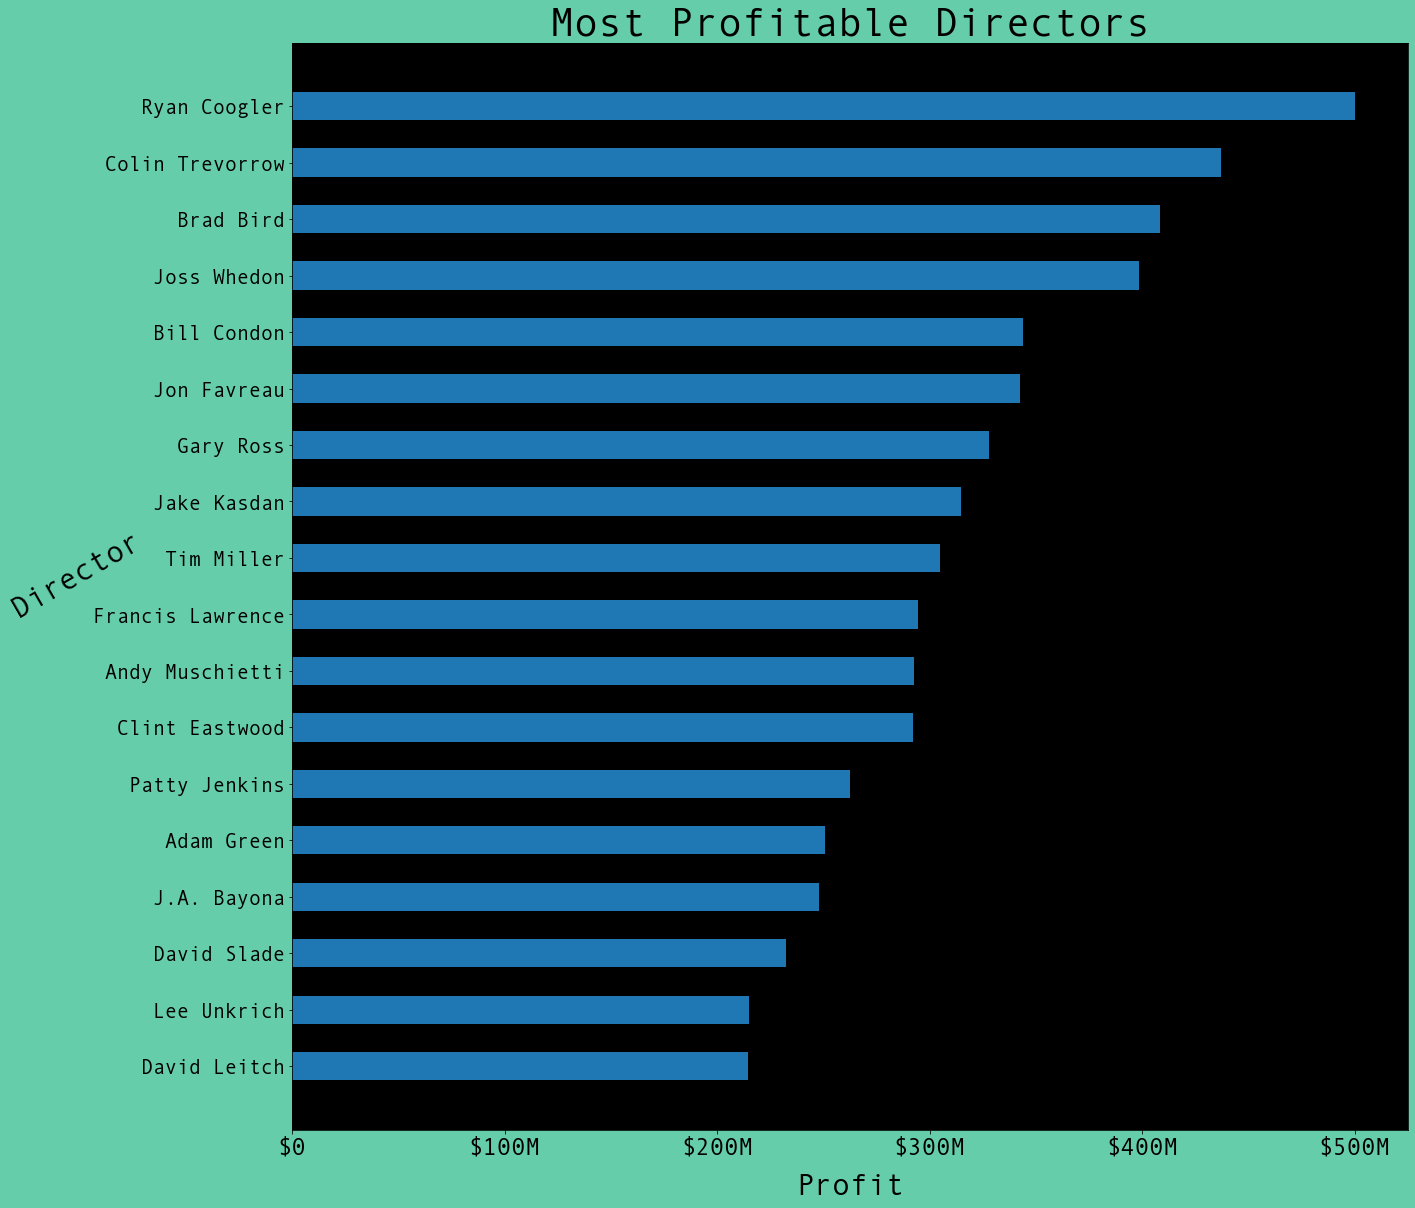

In [40]:
# notice only 20 of the top movies have directors listed, 2 are repeated
# so we will only have 18 names on the plot, their most profitable movie will be plotted
# the dataframe is already sorted by most profitable movies and only

# create the plot

fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
fig.set_facecolor('mediumaquamarine')
ax.set_facecolor('black')
ax.barh(top_profit_directors['primary_name'], width=top_profit_directors['Profit'], height=0.5)
ax.set_xlabel('Profit', font='Andale Mono', fontsize=30, labelpad=15)
ax.set_ylabel('Director', rotation=30, font='Andale Mono', fontsize=30, labelpad=10)
ax.set_title('Most Profitable Directors', font='Andale Mono', fontsize=40, weight='bold', loc="center", pad=0)
plt.xticks(font='Andale Mono', fontsize=24, weight='bold')
plt.yticks(font='Andale Mono', fontsize=20, weight='bold')
ax.invert_yaxis()
plt.ticklabel_format(axis='x', style='plain')
ax.xaxis.set_major_formatter(currency)
# plt.savefig('./images/top_profit_directors.png', dpi=200, bbox_inches='tight')

### Most Popular Directors
>I want to see who directed the most popular movies

In [41]:
# merge this with the dataset containing the most popular movies on common key 'original_title'

top_pop_directors = most_popular.merge(director_names_merged, on='original_title')

# top_pop_directors.drop(['Budget','Domestic Gross','tconst','primary_title','start_year','runtime_minutes','genres','nconst','writers','birth_year','death_year','primary_profession','known_for_titles'], axis=1, inplace=True)
top_pop_directors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 25
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   original_title      26 non-null     object 
 1   popularity          26 non-null     float64
 2   Budget              26 non-null     float64
 3   Domestic Gross      26 non-null     float64
 4   Profit              26 non-null     float64
 5   tconst              26 non-null     object 
 6   primary_title       26 non-null     object 
 7   start_year          26 non-null     int64  
 8   runtime_minutes     26 non-null     float64
 9   genres              26 non-null     object 
 10  nconst              26 non-null     object 
 11  writers             26 non-null     object 
 12  primary_name        26 non-null     object 
 13  birth_year          22 non-null     float64
 14  death_year          0 non-null      float64
 15  primary_profession  26 non-null     object 
 16  known_for_

In [42]:
top_pop_directors['primary_name'].sort_values()

18           Brad Bird
10        Bryan Singer
16        Bryan Singer
12        Bryan Singer
11    Christian Rivers
13        David Leitch
4          David Yates
3     Denis Villeneuve
23    Francis Lawrence
21         J.A. Bayona
2           James Gunn
14           James Wan
5            Jon Watts
7          Joss Whedon
1          Joss Whedon
15     Kenneth Branagh
24       Morten Tyldum
19      Peter Farrelly
0        Peter Jackson
6          Peyton Reed
25    Scott Derrickson
8        Taika Waititi
20          Tim Miller
9        Travis Knight
17            Wes Ball
22         Zack Snyder
Name: primary_name, dtype: object

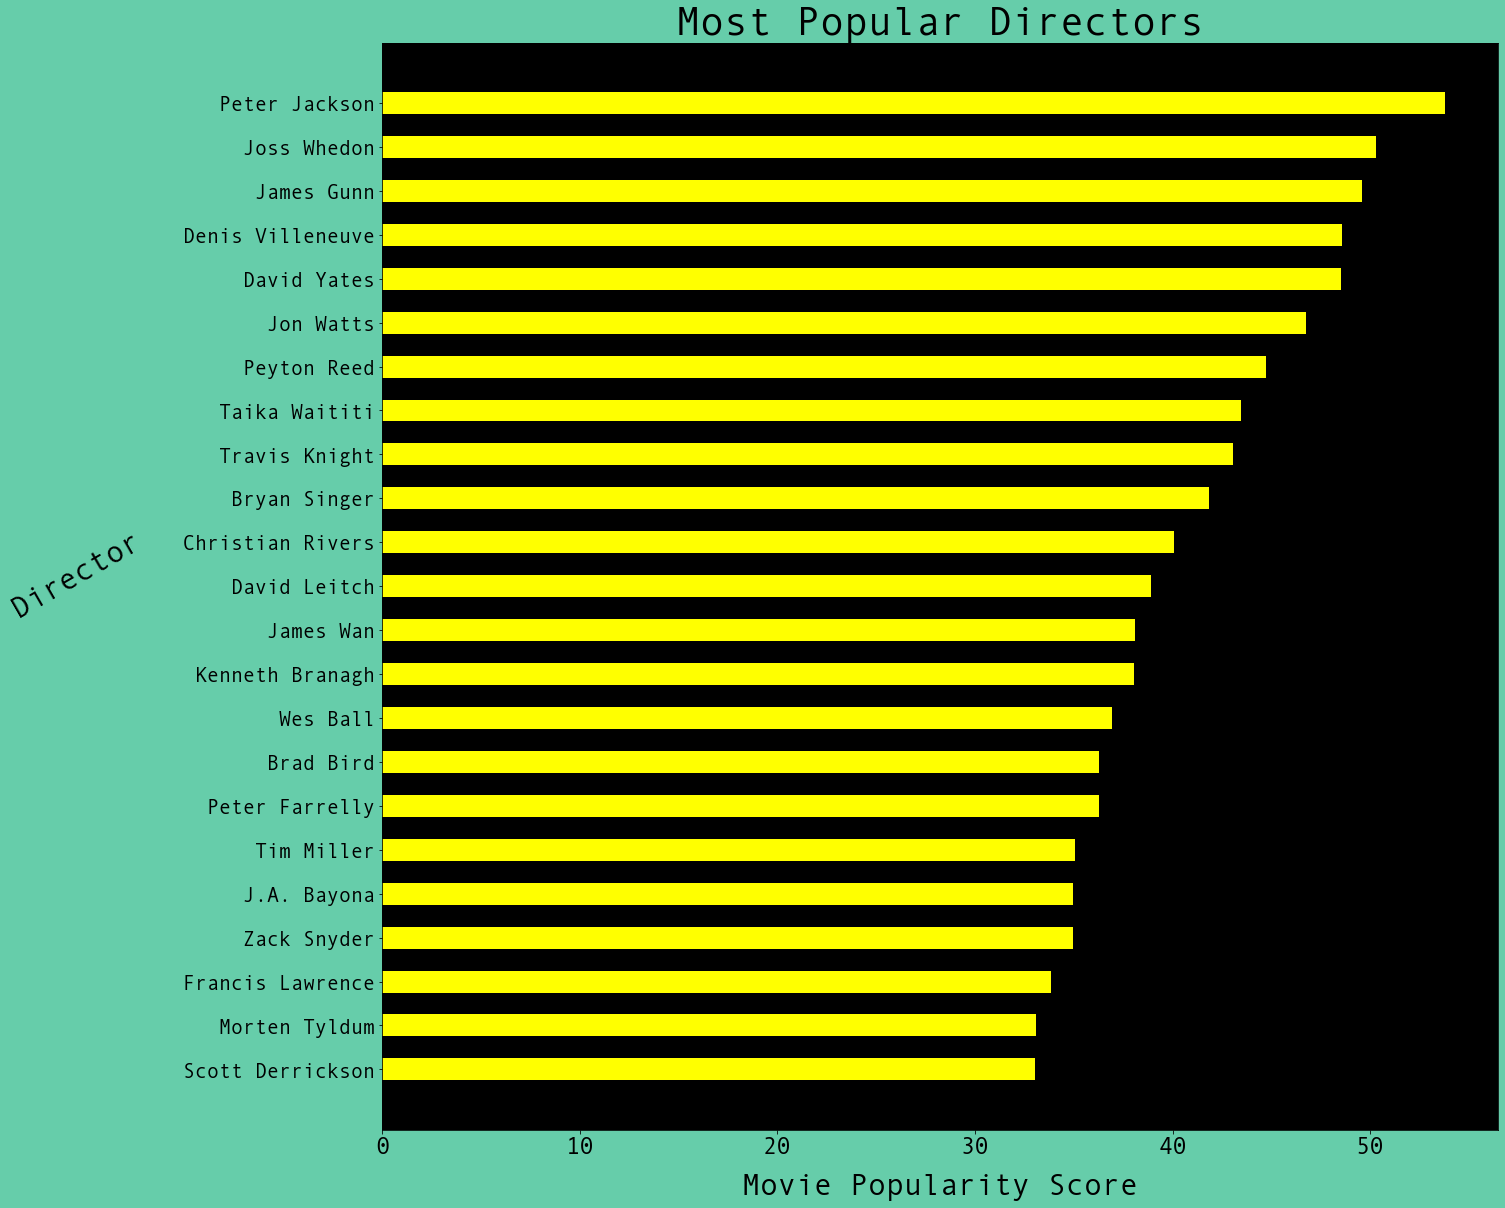

In [43]:
# notice only 26 of the top movies have directors listed, and there are 3 repeats
# so we will only have 23 names on the plot, their most popular movie will be plotted
# the dataframe is already sorted by most popular movies

# create the plot

fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
fig.set_facecolor('mediumaquamarine')
ax.set_facecolor('black')
ax.barh(top_pop_directors['primary_name'], width=top_pop_directors['popularity'], height=0.5, color='yellow')
ax.set_xlabel('Movie Popularity Score', font='Andale Mono', fontsize=30, labelpad=15)
ax.set_ylabel('Director', rotation=30, font='Andale Mono', fontsize=30, labelpad=100)
ax.set_title('Most Popular Directors', font='Andale Mono', fontsize=40, weight='bold', loc="center", pad=0)
plt.xticks(font='Andale Mono', fontsize=24, weight='bold')
plt.yticks(font='Andale Mono', fontsize=20, weight='bold')
ax.invert_yaxis()
plt.ticklabel_format(axis='x', style='plain')
# plt.savefig('./images/most_popular_directors.png', dpi=200, bbox_inches='tight')

## Results

### Filtering the data on a minimum number of votes and a minimum rating threshold, my analysis shows the highest rated genres by average movie rating are:
    
  > - **Action** is the top genre by a large margin 

  > - Other genres with high ratings are:
        - Thriller
        - Documentary
        - Comedy
        - Drama
        - Animation
        
### Looking at the gross profit of the top 30 movies of the modern era, my analysis shows the following:

   > - 15 were in the animation or computer-generated graphic genre, with many being franchises as well

   > - 13 were in the action genre:
        - All but 1 of those was part of a franchise, or connected series of movies
        - 6 were super-hero / comic book movies, and alll part of a franchise
        


### Further, looking at the popularity scores of the top 30 most popular movies of the modern era, my analysis shows the following:

   > - 22 were in the action genre, 19 were part of a franchise
        - 16 of these were super-hero / comic book franchises
        
   > - 3 were animation

   > - 3 were drama

   > - 2 were fantasy/adventure franchises

### We also looked at who the directors were on the most profitable and the most popular movies, with some directors appearing multiple times in these lists.

## In Conclusion
Based on these observations, there are three reccomendations that I will put forth

#### 1. Microsoft should acquire the rights to a super-hero / comic book franchise, or possibly another type of action franchise
>- The most popular and profitable genre overall is action.  
>- The most successful movies by both profitability and popularity were in the superhero / comic book sub-genre.  
>- All were franchises

#### 2. Microsoft should produce animated movies
>- 15 of the top 30 most profitable were animation

#### 3. Microsoft should attach top grossing and popular directors
>- Directors are the leaders on set and they can make or break a project. You want a proven and experienced director at the helm.  
>- They bring buzz and notoriety, as well as attract top talent and collaborative investment to their projects

## Further Considerations

I would consider looking at the budgets of popular movies. We saw a slight positive correlation between budget and popularity. This could be a function of an increase in marketing budget, pay scales of top talent, or something else. This could prove to be a worthwhile anaysis of where to allocate capital in a budget, and whether certain escalations could pay dividends for the bottmline.

#### Thank You!

Email: sudomakecoffee1@gmail.com  

GitHub: [@patrick-anastasio](https://github.com/patrick-anastasio)

LinkedIn: [patrickanastasio](linkedin.com/in/patrickanastasio/)
